In [1]:
import torch
import os,sys
sys.path.append('G:/pycharm/apt/')
import numpy as np
import h5py
import apav
import matplotlib.pyplot as plt

In [2]:
import RangingNN

In [3]:
import multiprocessing
pool = multiprocessing.Pool()
pool._processes

6

# Creat training datasets for ranging

In [ ]:
# precheck if there is bad ranges that width <0.01
k = 5
spec= apav.load_apt(datalist[k])
rng = apav.RangeCollection.from_rrng(rangelist[k])
rng_col = apav.RangeCollection(rng)
ranged = anl.RangedMassSpectrum(spec, rng_col, percent=True, bin_width= 0.01)

%gui qt
import apav.analysis as anl
plot = ranged.plot()
plot.show()

In [2]:
from peak_detection.RangingNN.data_generation import Augmentation
aug = Augmentation(apt_file='D:/APT_DATA/R78_161188-v01 GaAs.apt',ranging_file='D:/APT_DATA/R78_161188-v01 GaAs.RRNG', 
                   savepath = 'D:/APT_DATA/hdf5s/')
aug.file2h5() # 16:31

Augmentation finished for R78_161188-v01 GaAs
h5 file writting finished


In [ ]:
with h5py.File('D:/APT_DATA/hdf5s/R13_40310Zr Top Level ROI.h5', 'r') as f:
    sp = np.asarray(f['input'])
    lb = np.asarray(f['label'])
    print(np.array(f['ion']))
    print(np.array(f['if_norm']))
    print(np.asarray(f['if_peak_shift']))

In [5]:
filelist = sorted(os.listdir('D:/APT_DATA/'))
datalist = []
rangelist = []
for f in filelist:
    if f[-3:]=='apt':
        print(f)
        datalist.append('D:/APT_DATA/'+f)
        rangelist.append('D:/APT_DATA/'+f[:-3]+ 'RRNG')

len(datalist), len(rangelist)

R13_40310Zr Top Level ROI.apt
R16_50678 NiPdSi Top Level ROI.apt
R17_101977 SiN.apt
R17_89420-v03 ranging for uw.apt
R17_94469 WRe Top Level ROI.apt
R17_98556-v02 ranging for uw.apt
R18_61451 matchUSYD.apt
R2001_185741ZrSiO UW Analysis Zircon.apt
R40_110290-v01 AuAlloy.apt
R41_143855Ru Top Level ROI.apt
R5086_258504_UNSM_SS.apt
R5100_228062 W.apt
R5100_235274UW Ranging Top Level ROI.apt
R56_138794 YWT Top Level ROI.apt
R6001_233217CuBe.apt
R6006_254275 Cu LP.apt
R6006_254276 Cu VpL.apt
R6012_264025 7000Al UW Ranging.apt
R6025_267386_NMC811_M04 example analysis.apt
R69_152985-v01 Si device.apt
R69_152985-v01 Top Level ROI.apt
R78_161188-v01 GaAs.apt
R79_160199-v01 SiO.apt


(23, 23)

In [7]:
from RangingNN.data_generation import Augmentation

aug = Augmentation(apt_file=datalist[7], ranging_file=rangelist[7], savepath = 'D:/APT_DATA/hdf5s/')
rg = aug.load_ranging()
sp = aug.load_voxel_spectrum()

In [10]:
for i in range(23):
    aug = Augmentation(apt_file=datalist[i], ranging_file=rangelist[i], savepath = 'D:/APT_DATA/hdf5s/')
    aug.file2h5()
    print('Finished', i)

Augmentation finished for R13_40310Zr Top Level ROI
h5 file writting finished
Finished 0
Augmentation finished for R16_50678 NiPdSi Top Level ROI
h5 file writting finished
Finished 1
Augmentation finished for R17_101977 SiN
h5 file writting finished
Finished 2
Augmentation finished for R17_89420-v03 ranging for uw
h5 file writting finished
Finished 3
Augmentation finished for R17_94469 WRe Top Level ROI
h5 file writting finished
Finished 4
Augmentation finished for R17_98556-v02 ranging for uw
h5 file writting finished
Finished 5
Augmentation finished for R18_61451 matchUSYD
h5 file writting finished
Finished 6
Augmentation finished for R2001_185741ZrSiO UW Analysis Zircon
h5 file writting finished
Finished 7
Augmentation finished for R40_110290-v01 AuAlloy
h5 file writting finished
Finished 8
Augmentation finished for R41_143855Ru Top Level ROI
h5 file writting finished
Finished 9
Augmentation finished for R5086_258504_UNSM_SS
h5 file writting finished
Finished 10
Augmentation finishe

In [11]:

with h5py.File('D:/APT_DATA/hdf5s/R78_161188-v01 GaAs.h5', 'r') as f:
    sp = np.asarray(f['input'])
    lb = np.asarray(f['label'])
    print(np.array(f['ion']))
    print(np.array(f['if_norm']))
    print(np.asarray(f['if_peak_shift']))

[b'As1' b'As1' b'As1' b'Ga1' b'Ga1' b'Ga1' b'Ga1' b'Si1' b'Si1' b'As4'
 b'As5' b'As3' b'As3' b'As2' b'Zn1' b'Zn1' b'C1O2' b'H1' b'H2' b'H2O1'
 b'Ga1H2']
True
True


In [12]:
sp.shape, lb.shape

((1100, 30720), (1100, 21, 2))

## check the dataset class

In [13]:
from RangingNN.dataset import BaseDataset
dd = BaseDataset('D:/APT_DATA/hdf5s/')
dd.__len__()

Scanning D:/APT_DATA/hdf5s/... 43 spectrums, 0 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:01<00:00, 37.83it/s]


47300

Text(0, 0.5, 'normalized counts')

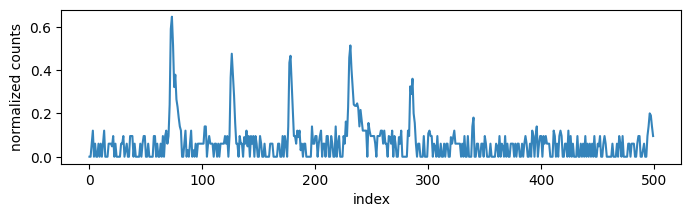

In [24]:
fig = plt.figure(figsize = (8,2))
#plt.plot(see2['spectrum'].T[:10000],alpha = 0.8)
plt.plot(see2['spectrum'].T[1200:1700],alpha = 0.9)
plt.xlabel('index')
plt.ylabel('normalized counts')


In [10]:
from peak_detection.RangingNN.dataset import build_dataloader

loader = build_dataloader(dd, batch=16, workers=4, shuffle=True, rank=-1)

# TRAIN

In [2]:
import torch
import os,sys
import numpy as np
import h5py
import matplotlib.pyplot as plt
sys.path.append('G:/pycharm/apt/')
from RangingNN.trainer import BaseTrainer
import yaml
from pathlib import Path
torch.cuda.is_available(),torch.__version__

(False, '2.2.1+cpu')

In [8]:
pred0 = torch.tensor(pred0)

RuntimeError: Could not infer dtype of ellipsis

In [24]:
best = torch.load('D:/APT_notebooks/materials/yolov8n.pt',map_location=torch.device('cpu'))
torch.save(best['model'], 'D:/APT_DATA/model_weights/yolov8n.pt')

In [13]:
import torch
import os,sys
import numpy as np
import h5py
import matplotlib.pyplot as plt
sys.path.append('G:/pycharm/apt/')
from RangingNN.trainer import BaseTrainer
import yaml
from pathlib import Path
yaml_dict = yaml.safe_load(Path("G:/pycharm/apt/RangingNN/cfg/current.yaml").read_text())

trainer = BaseTrainer(cfg=yaml_dict)
#trainer.train()


In [17]:
model.stride

tensor([ 8., 16., 32.])

In [4]:
torch.save(model,'G:/pycharm/apt/peak_detection/RangingNN/cfg/empty.pt')

In [25]:
from RangingNN.YOLO1D import DetectionModel

model = DetectionModel()  # cfg="yolov8.yaml"
model

scale='[0.33, 0.25, 512]'.


DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv1d(1, 16, kernel_size=(3,), stride=(2,), padding=(1,), bias=False)
      (bn): BatchNorm1d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv1d(16, 32, kernel_size=(3,), stride=(2,), padding=(1,), bias=False)
      (bn): BatchNorm1d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv1d(32, 32, kernel_size=(1,), stride=(1,), bias=False)
        (bn): BatchNorm1d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv1d(48, 32, kernel_size=(1,), stride=(1,), bias=False)
        (bn): BatchNorm1d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (m): ModuleList(
 

In [6]:
out = model(torch.ones((1,1,30720)))
out[0].shape,out[1].shape,out[2].shape

(torch.Size([1, 33, 3840]),
 torch.Size([1, 33, 1920]),
 torch.Size([1, 33, 960]))

In [7]:
batch = [{'a':1,'b':2}]*4
values = list(zip(*[list(b.values()) for b in batch]))
len(values[0])

4

In [6]:
bench = torch.load(r'G:\pycharm\apt\materials\yolov8n.pt')

In [8]:
bench['model'].model[-1].stride

NameError: name 'bench' is not defined

In [ ]:
gt_bboxes = torch.ones((3, 100,2))
mask_gt = gt_bboxes.sum(2, keepdim=True).gt_(0)
mask_gt

In [6]:
ori = torch.zeros((1,32))
see = torch.cat([ori,ori,ori], 0)
print(see.shape)
for i in range(len(see)):
    see[i] += i  # add target image index for build_targets()


torch.Size([3, 32])


In [ ]:
    def preprocess(self, targets, batch_size, scale_tensor):
        """
        preprocess the target so that they are denormalized and in xyxy format
        Preprocesses the target counts and matches with the input batch size to output a tensor.
        """
        if targets.shape[0] == 0:
            out = torch.zeros(batch_size, 0, 3, device=self.device)
        else:
            out = targets.deepcopy()
            out[..., 1:3] = cw2lh(out[..., 1:3].mul_(scale_tensor))
        return out


# creat training dataset for classification

#TODO 
#remove complex molecule, like AuZn